In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img=cv2.imread('./test_image/kapil_dev53.png')
img.shape

(215, 215, 3)

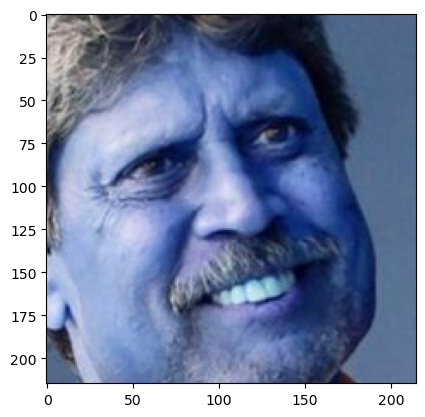

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(215, 215)

In [6]:
gray

array([[140, 141, 148, ..., 112, 113, 112],
       [152, 142, 143, ..., 112, 112, 112],
       [131, 136, 156, ..., 111, 111, 112],
       ...,
       [113, 113, 112, ..., 124, 124, 123],
       [113, 112, 112, ..., 125, 125, 126],
       [112, 112, 111, ..., 126, 126, 124]], dtype=uint8)

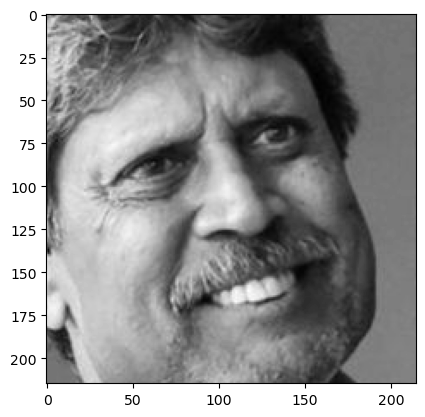

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[  7,   6, 196, 196]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(7, 6, 196, 196)

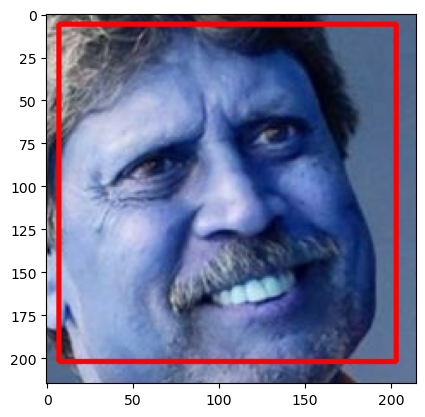

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

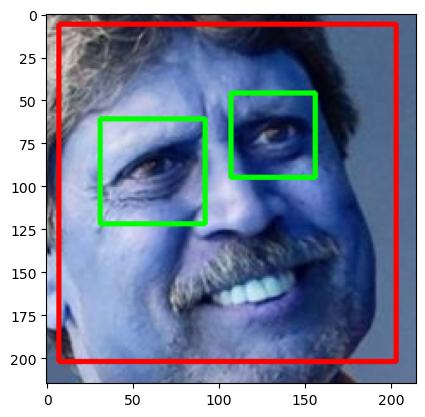

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

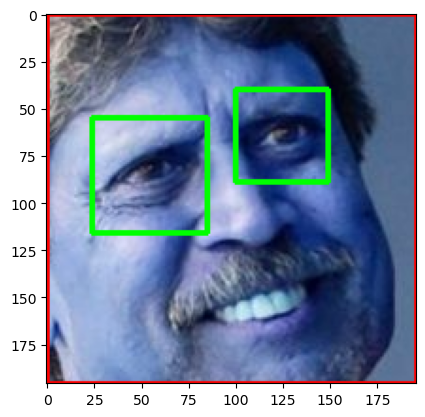

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(196, 196, 3)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


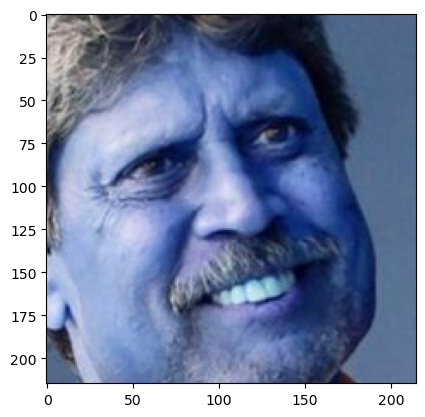

In [16]:
original_image = cv2.imread('./test_image/kapil_dev53.png')
plt.imshow(original_image)

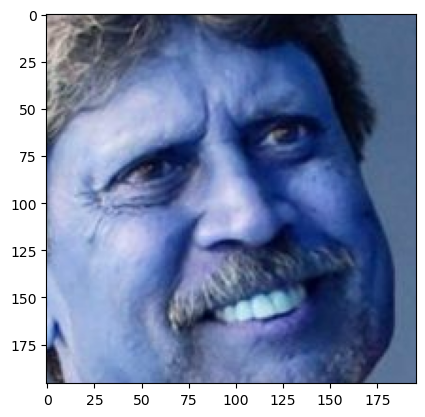

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/kapil_dev53.png')
plt.imshow(cropped_image)

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        if(path_to_cr_data):
            a=entry.path
            if(a.split('/')[-1]!="cropped"):
                img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/kapil_dev',
 './dataset/ms_dhoni',
 './dataset/rahul_dravid',
 './dataset/sachin_tendulkar',
 './dataset/sunil_gavaskar',
 './dataset/virat_kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
    pass
else:
    os.mkdir(path_to_cr_data)

In [45]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roii_color = get_cropped_image_if_2_eyes(entry.path)
        if roii_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roii_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

kapil_dev
ms_dhoni
rahul_dravid
sachin_tendulkar
sunil_gavaskar
virat_kohli


# WAVELET TRANSFORM

In [46]:
cropped_img = np.array(roi_color)
cropped_img.shape

(196, 196, 3)

In [47]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

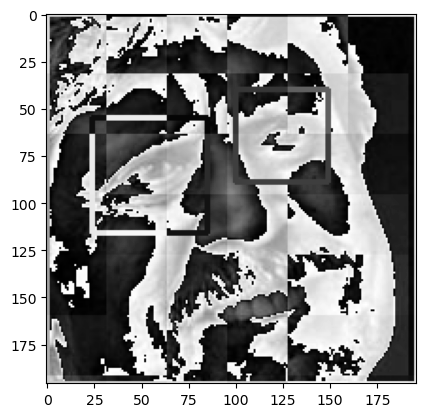

In [48]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [49]:
celebrity_file_names_dict

{'kapil_dev': ['./dataset/cropped/kapil_dev/kapil_dev1.png',
  './dataset/cropped/kapil_dev/kapil_dev2.png',
  './dataset/cropped/kapil_dev/kapil_dev3.png',
  './dataset/cropped/kapil_dev/kapil_dev4.png',
  './dataset/cropped/kapil_dev/kapil_dev5.png',
  './dataset/cropped/kapil_dev/kapil_dev6.png',
  './dataset/cropped/kapil_dev/kapil_dev7.png',
  './dataset/cropped/kapil_dev/kapil_dev8.png',
  './dataset/cropped/kapil_dev/kapil_dev9.png',
  './dataset/cropped/kapil_dev/kapil_dev10.png',
  './dataset/cropped/kapil_dev/kapil_dev11.png',
  './dataset/cropped/kapil_dev/kapil_dev12.png',
  './dataset/cropped/kapil_dev/kapil_dev13.png',
  './dataset/cropped/kapil_dev/kapil_dev14.png',
  './dataset/cropped/kapil_dev/kapil_dev15.png',
  './dataset/cropped/kapil_dev/kapil_dev16.png',
  './dataset/cropped/kapil_dev/kapil_dev17.png',
  './dataset/cropped/kapil_dev/kapil_dev18.png',
  './dataset/cropped/kapil_dev/kapil_dev19.png',
  './dataset/cropped/kapil_dev/kapil_dev20.png',
  './dataset/cro

In [50]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'kapil_dev': 0,
 'ms_dhoni': 1,
 'rahul_dravid': 2,
 'sachin_tendulkar': 3,
 'sunil_gavaskar': 4,
 'virat_kohli': 5}

In [73]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue  # Skip this image and move to the next one
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [74]:
len(X[0])

4096

In [75]:
X[0]

array([[ 31],
       [ 37],
       [ 36],
       ...,
       [253],
       [253],
       [253]], dtype=uint8)

In [76]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(363, 4096)

In [77]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8351648351648352

In [79]:
len(X_test)

91

In [80]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.91      0.67      0.77        15
           2       0.57      0.80      0.67         5
           3       0.67      0.67      0.67        12
           4       0.90      0.93      0.91        28
           5       1.00      0.92      0.96        13

    accuracy                           0.84        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.85      0.84      0.84        91



In [81]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [82]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [83]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.775758,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.555152,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.772054,{'logisticregression__C': 1}


In [84]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [85]:
best_estimators['svm'].score(X_test,y_test)

0.8351648351648352

In [86]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7802197802197802

In [87]:
best_clf = best_estimators['svm']

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  0,  0,  2,  0,  0],
       [ 3, 10,  1,  0,  1,  0],
       [ 0,  1,  4,  0,  0,  0],
       [ 1,  0,  1,  8,  2,  0],
       [ 0,  0,  0,  2, 26,  0],
       [ 0,  0,  1,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

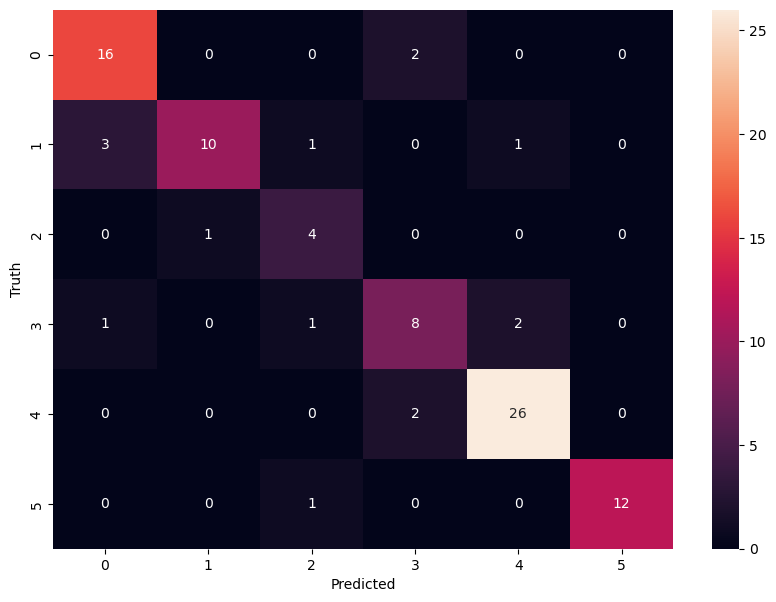

In [89]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
class_dict

{'kapil_dev': 0,
 'ms_dhoni': 1,
 'rahul_dravid': 2,
 'sachin_tendulkar': 3,
 'sunil_gavaskar': 4,
 'virat_kohli': 5}

In [91]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [92]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))